In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
import os

In [2]:
dicionarioMeses = {
    1: "Janeiro", 
    2: "Fevereiro", 
    3: "Março", 
    4: "Abril", 
    5: "Maio", 
    6: "Junho", 
    7: "Julho", 
    8: "Agosto",
    9: "Setembro", 
    10: "Outubro", 
    11: "Novembro", 
    12: "Dezembro"
}
    
def pegarNomeMes(numeroMes):
    return dicionarioMeses[numeroMes]

In [41]:
def lerTabelasDiretorio(ano):
    caminhoDados = "../doc/Dados/CAGED"
    colunasUtilizaveis = ["sexo", "tipomovimentação"]
    
    fonteDados = os.listdir(caminhoDados + "/" + ano)
    
    # Retira os arquivos que não são do tipo .txt da lista
    for arquivo in fonteDados:
        if ".txt" not in arquivo:
            del fonteDados[fonteDados.index(arquivo)]
            
    tabelas = {}
    
    for nomeTabela in fonteDados:
        valorMes = int(nomeTabela.split(".")[0][-2:])  # Pega os dois últimos valores do nome do arquivo, que representam o mês e converte para um inteiro
        nomeMes = pegarNomeMes(valorMes)
        tabelas[nomeMes] = pandas.read_csv(caminhoDados + "/" + ano + "/" + nomeTabela,
                                           delimiter=";",
                                           usecols=colunasUtilizaveis)
        
    return tabelas

In [134]:
colunasUtilizaveis = ["sexo", "tipomovimentação"]

dados2020 = lerTabelasDiretorio("2020")
dados2021 = lerTabelasDiretorio("2021")

In [133]:
total = {}

for mes in dados2020:
    grupo = dados2020[mes].groupby(["sexo", "tipomovimentação"])
    
    total[mes] = {}
    
    for chave, valor in grupo:
        grupinho = grupo.get_group(chave)

        totalMovi = pegarSomaTotalGrupo(grupinho, "tipomovimentação")
        tipoMovi = pegarTipoColunaGrupo(grupinho, "tipomovimentação")

        tipoSexo = pegarTipoColunaGrupo(grupinho, "sexo")

        if tipoSexo not in total[mes]:
            total[mes][tipoSexo] = {}

        if tipoMovi not in total[mes][tipoSexo]:
            total[mes][tipoSexo][tipoMovi] = totalMovi
        else:
            total[mes][tipoSexo][tipoMovi] += totalMovi

def pegarSomaTotalGrupo(grupo, colunaParaSomar):
    return grupo.groupby(colunaParaSomar).count().values[0][0]

def pegarTipoColunaGrupo(grupo, nomeColuna):
    indexColuna = grupo.columns.get_loc(nomeColuna)
    return grupo.sample().values[0][indexColuna]

In [51]:
dicionarioDeDados = {
    "sexo": {
        1: "Homem",
        3: "Mulher",
        9: "Não identificado"
    },
    "tipomovimentação": {
        10: "Admissão", #"Admissão por primeiro emprego",
        20: "Admissão", #"Admissão por reemprego,"
        25: "Admissão", #"Admissão por contrato trabalho prazo determinado",
        31: "Demissão", #"Desligamento por demissão sem justa causa",
        32: "Demissão", #"Desligamento por demissão com justa causa",
        33: "Demissão", #"Culpa Recíproca",
        35: "Admissão", #"Admissão por reintegração",
        40: "Demissão", #"Desligamento a pedido",
        43: "Demissão", #"Término contrato trabalho prazo determinado",
        45: "Demissão", #"Desligamento por Término de contrato",
        50: "Demissão", #"Desligamento por aposentadoria",
        60: "Demissão", #"Desligamento por morte",
        70: "Admissão", #"Admissão por transferência",
        80: "Demissão", #"Desligamento por transferência",
        90: "Demissão", #"Desligamento por Acordo entre empregado e empregador",
        98: "Demissão", #"Desligamento de Tipo Ignorado",
        99: "Não Identificado"
    }
}

In [52]:
def pegarSomaTotalGrupo(grupo, colunaParaSomar):
    return grupo.groupby(colunaParaSomar).count().values[0][0]

def pegarTipoColunaGrupo(grupo, nomeColuna):
    indexColuna = grupo.columns.get_loc(nomeColuna)
    return grupo.sample().values[0][indexColuna]

def agruparDados(dadosParaAgrupar):
    dadosAgrupados = {}
    
    for mes in dadosParaAgrupar:
        dadosAgrupados[mes] = {}
        
        for generoCru in dadosParaAgrupar[mes]:
            genero = dicionarioDeDados["sexo"][generoCru]
            
            if genero not in dadosAgrupados[mes]:
                dadosAgrupados[mes][genero] = {}
            
            for tipoMovimentacaoCru in dadosParaAgrupar[mes][generoCru]:
                tipoMovimentacao = dicionarioDeDados["tipomovimentação"][tipoMovimentacaoCru]
                
                if tipoMovimentacao not in dadosAgrupados[mes][genero]:
                    dadosAgrupados[mes][genero][tipoMovimentacao] = dadosParaAgrupar[mes][generoCru][tipoMovimentacaoCru]
                else:
                    dadosAgrupados[mes][genero][tipoMovimentacao] += dadosParaAgrupar[mes][generoCru][tipoMovimentacaoCru]
    
    return dadosAgrupados
            

def filtrarDados(dadosCrus):
    total = {}
    
    for mes in dadosCrus:
        grupo = dadosCrus[mes].groupby(["sexo", "tipomovimentação"])

        total[mes] = {}

        for chave, valor in grupo:
            grupinho = grupo.get_group(chave)

            totalMovi = pegarSomaTotalGrupo(grupinho, "tipomovimentação")
            tipoMovi = pegarTipoColunaGrupo(grupinho, "tipomovimentação")

            tipoSexo = pegarTipoColunaGrupo(grupinho, "sexo")

            if tipoSexo not in total[mes]:
                total[mes][tipoSexo] = {}

            if tipoMovi not in total[mes][tipoSexo]:
                total[mes][tipoSexo][tipoMovi] = totalMovi
            else:
                total[mes][tipoSexo][tipoMovi] += totalMovi
                
    dadosTratados = agruparDados(total)
    
    return dadosTratados

In [54]:
dadosFiltrados2020 = filtrarDados(dados2020)
dadosFiltrados2021 = filtrarDados(dados2021)

In [124]:
def plotarGrafico(gruposDeDados, legenda, titulo, proporcao):
    plt.figure(figsize=proporcao, dpi=500)
    plt.subplot(212)
    
    for grupo in gruposDeDados:
        plt.plot(grupo["x"], grupo["y"])

    # Desabilita a notação científica no eixo Y
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

    # Coloca um título no gráfico
    plt.title(titulo)
    
    # Adiciona linhas de referência
    plt.grid(True)
    
    # Adiciona a legenda ao gráfico
    plt.legend(legenda, bbox_to_anchor=(1.2, 1.0), loc='upper right')

    # Exibe o gráfico com todos os subgráficos
    plt.show()

In [106]:
def dadosPorGenero(dados, generoParaFiltrar):
    filtradoPorGenero = {}
    
    for mes in dados:
        for genero in dados[mes]:
            if genero == generoParaFiltrar:
                admissoes = dados[mes][genero]["Admissão"]
                demissoes = dados[mes][genero]["Demissão"]
                
                filtradoPorGenero[mes] = {
                    "Admissão": admissoes,
                    "Demissão": demissoes,
                }
    
    return filtradoPorGenero

def prepararDadosParaPlotar(dados, aliasX = "", aliasY = ""):
    dadosPreparados = {
        "x": [],
        "y": []
    }
    
    for mes in dados:
        dadosPreparados["x"].append(mes)
        dadosPreparados["y"].append(dados[mes][aliasY])
    
    return dadosPreparados

In [138]:
homens2020 = dadosPorGenero(dadosFiltrados2020, "Homem")
mulheres2020 = dadosPorGenero(dadosFiltrados2020, "Mulher")

homens2021 = dadosPorGenero(dadosFiltrados2021, "Homem")
mulheres2021 = dadosPorGenero(dadosFiltrados2021, "Mulher")

In [139]:
# Dados de 2020
dadosAdmissaoHomens2020 = prepararDadosParaPlotar(homens2020, aliasY = "Admissão")
dadosDemissaoHomens2020 = prepararDadosParaPlotar(homens2020, aliasY = "Demissão")

dadosAdmissaoMulheres2020 = prepararDadosParaPlotar(mulheres2020, aliasY = "Admissão")
dadosDemissaoMulheres2020 = prepararDadosParaPlotar(mulheres2020, aliasY = "Demissão")

# Dados de 2021
dadosAdmissaoHomens2021 = prepararDadosParaPlotar(homens2021, aliasY = "Admissão")
dadosDemissaoHomens2021 = prepararDadosParaPlotar(homens2021, aliasY = "Demissão")

dadosAdmissaoMulheres2021 = prepararDadosParaPlotar(mulheres2021, aliasY = "Admissão")
dadosDemissaoMulheres2021 = prepararDadosParaPlotar(mulheres2021, aliasY = "Demissão")

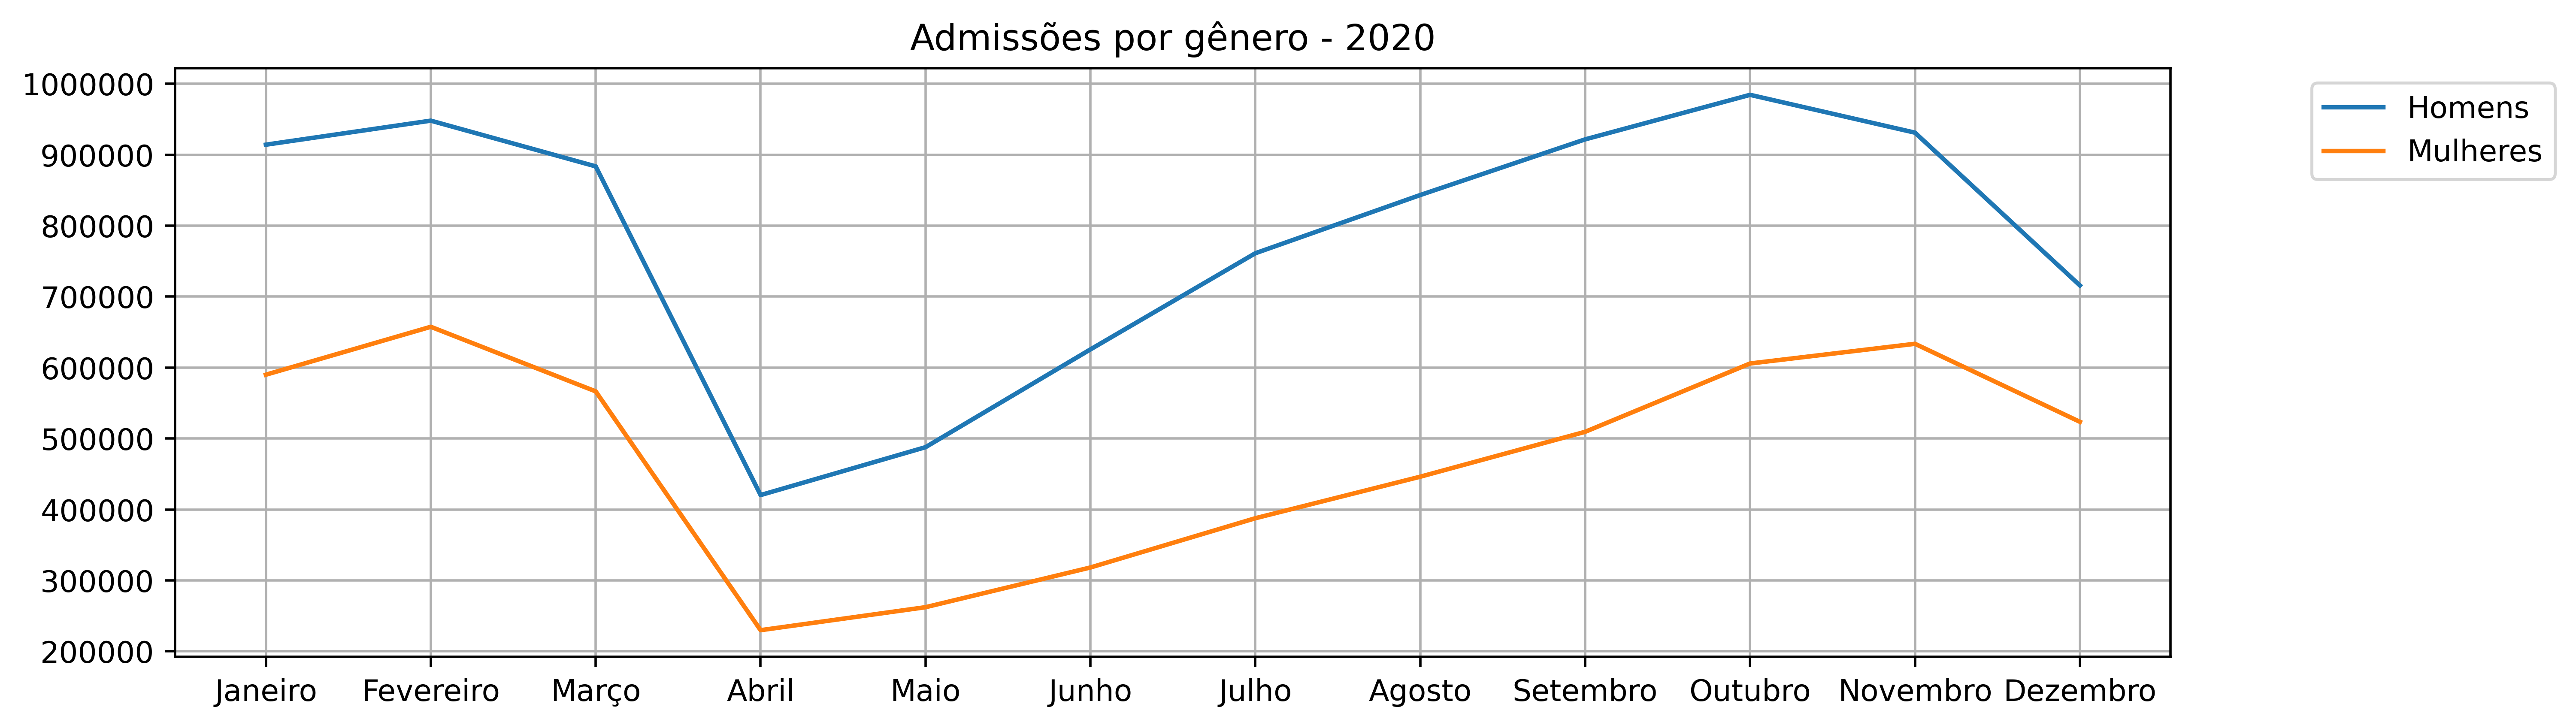

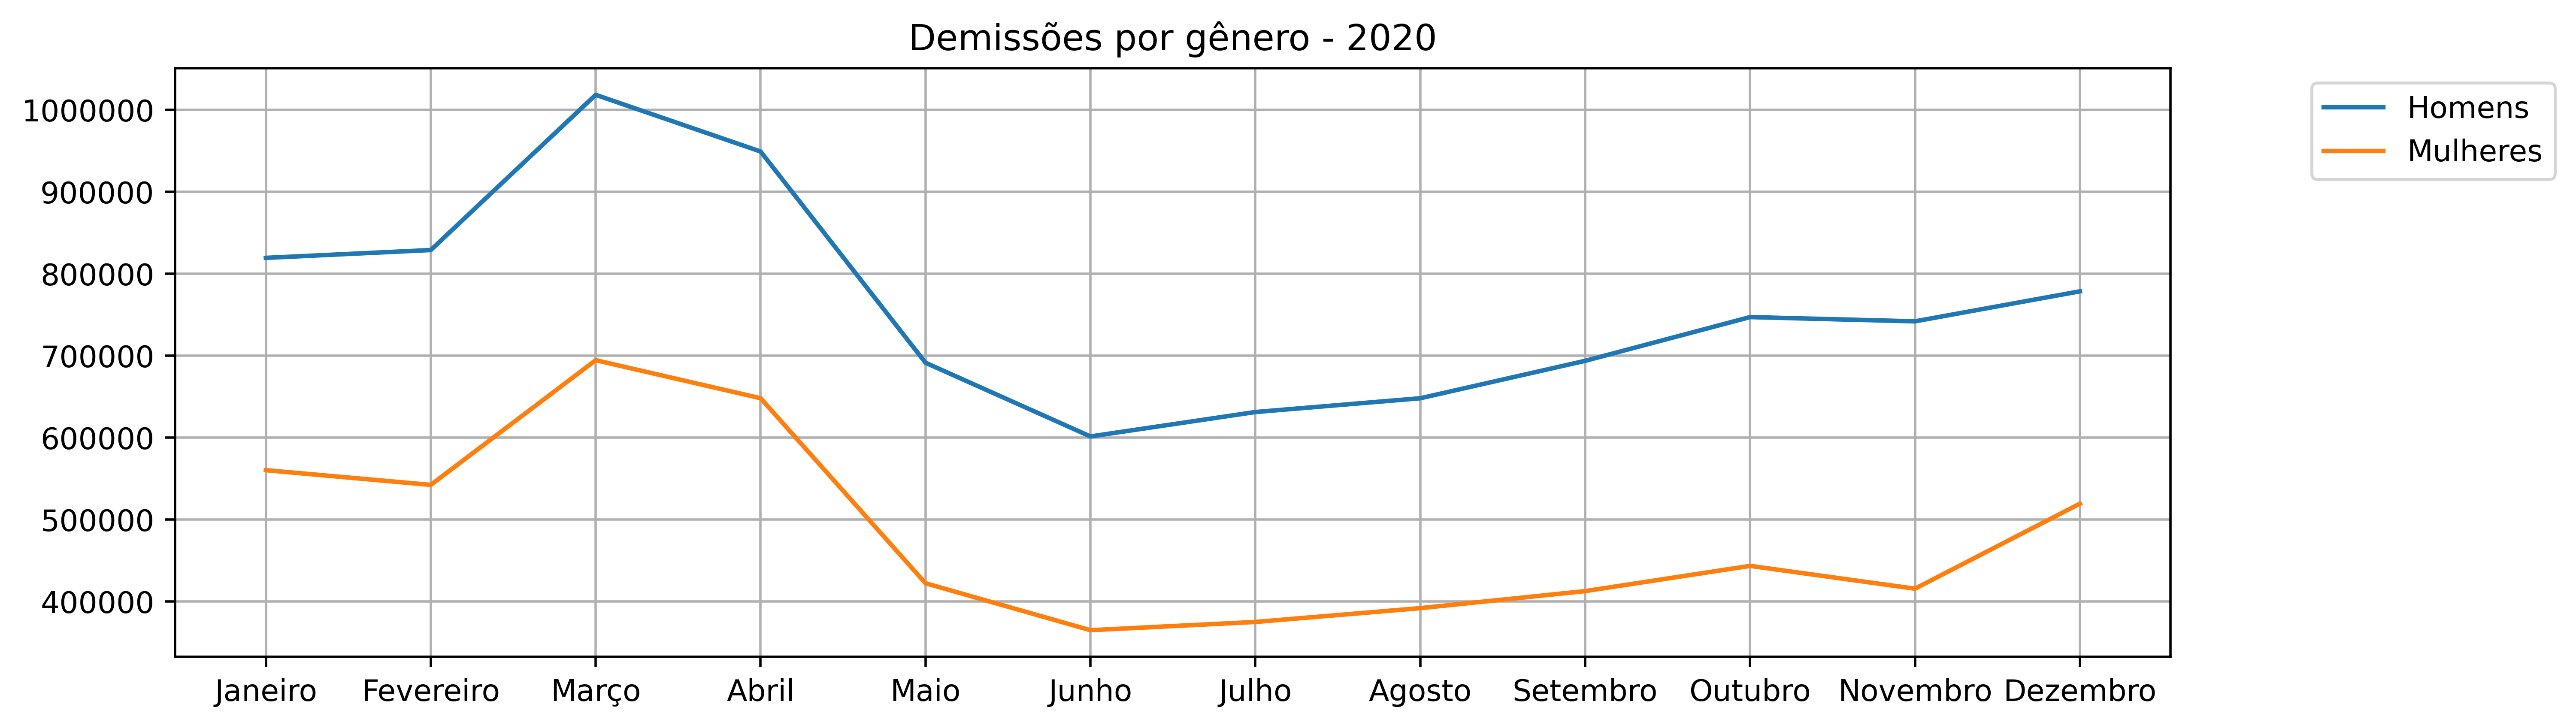

In [140]:
# Gráficos de 2020
plotarGrafico([dadosAdmissaoHomens2020, dadosAdmissaoMulheres2020], ["Homens", "Mulheres"], "Admissões por gênero - 2020", (12, 8))
plotarGrafico([dadosDemissaoHomens2020, dadosDemissaoMulheres2020], ["Homens", "Mulheres"], "Demissões por gênero - 2020", (12, 8))

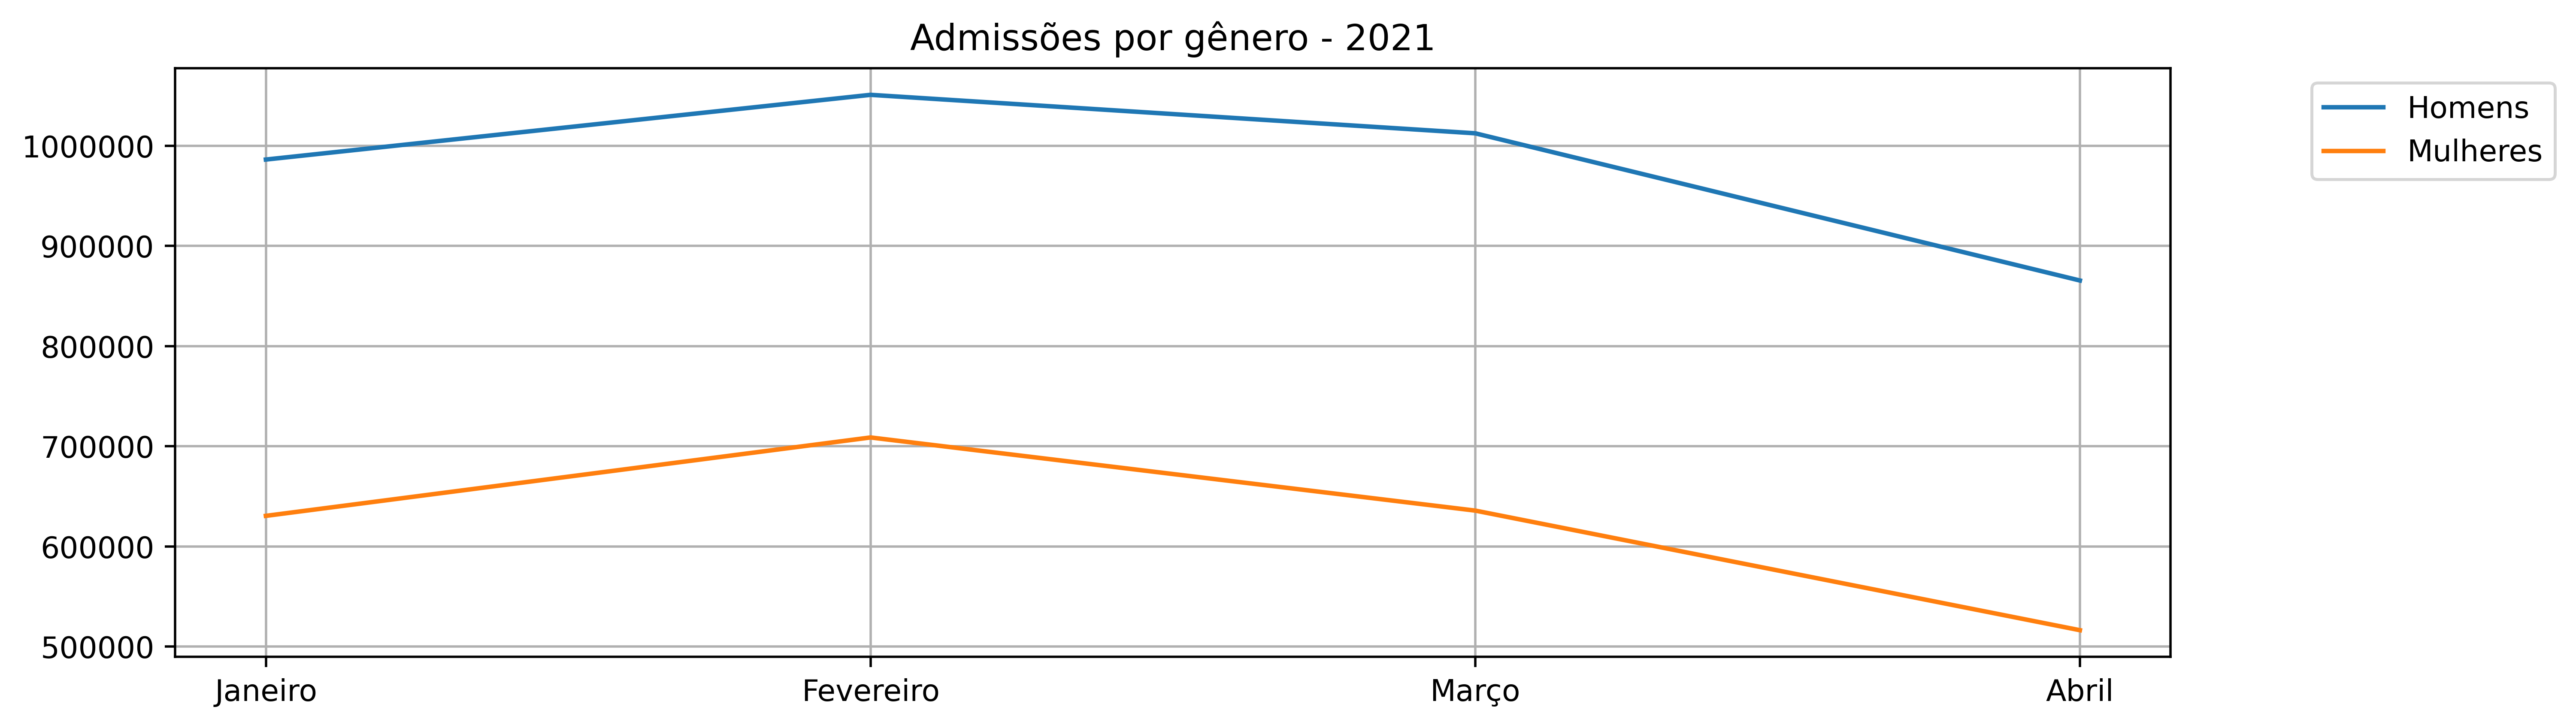

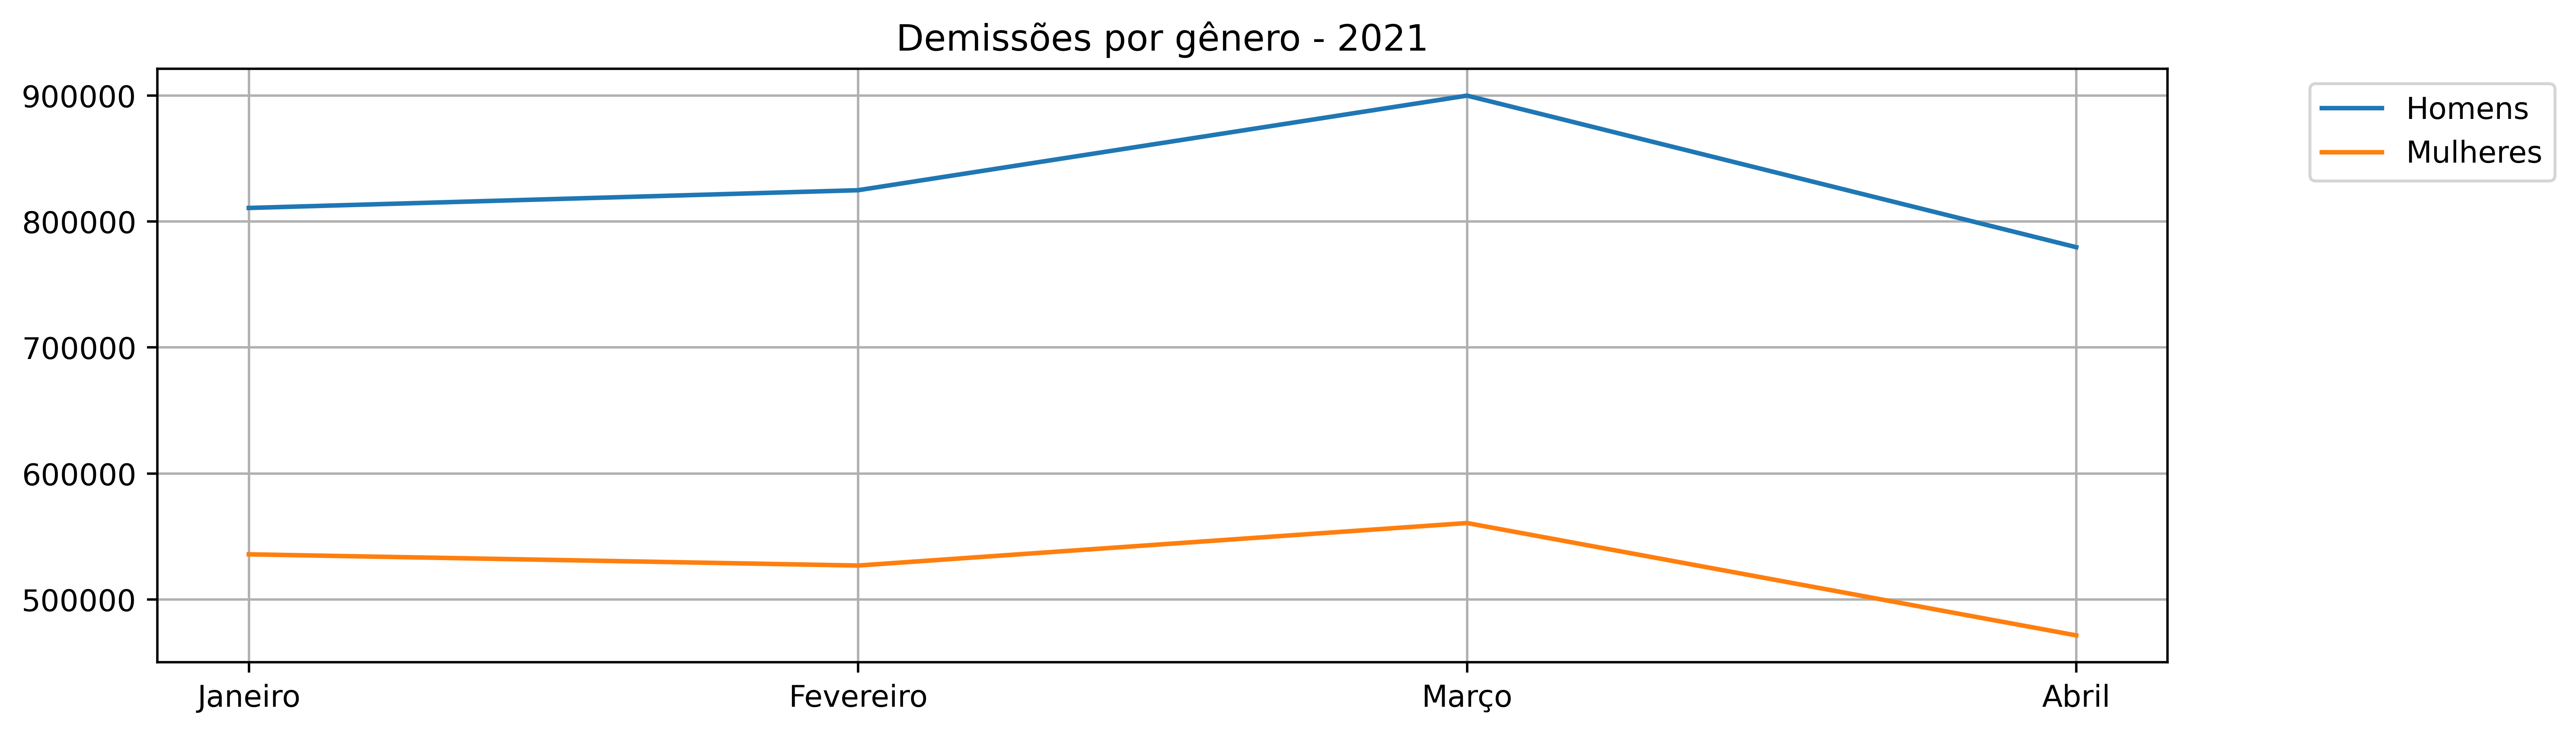

In [135]:
# Gráficos de 2021
plotarGrafico([dadosAdmissaoHomens2021, dadosAdmissaoMulheres2021], ["Homens", "Mulheres"], "Admissões por gênero - 2021", (12, 8))
plotarGrafico([dadosDemissaoHomens2021, dadosDemissaoMulheres2021], ["Homens", "Mulheres"], "Demissões por gênero - 2021", (12, 8))